Load the necessary packages

In [2]:
import pandas as pd

Load the yearwise internal displacement data as a dataframe

In [4]:
idp_df = pd.read_csv('data/Internal Displacement Data/IDPS_climate_disaster_yearwise.csv')
idp_df.head()

,ISO3,Name,Year,Conflict Stock Displacement,Conflict Stock Displacement (Raw),Conflict Internal Displacements,Conflict Internal Displacements (Raw),Disaster Internal Displacements,Disaster Internal Displacements (Raw),Disaster Stock Displacement,Disaster Stock Displacement (Raw)
0,#country+code,#country+name,#date+year,#affected+idps+ind+stock+conflict,#affected+idps+ind+stock+conflict_raw,#affected+idps+ind+internaldisp+conflict,#affected+idps+ind+internaldisp+conflict_raw,#affected+idps+ind+internaldisp+disaster,#affected+idps+ind+internaldisp+disaster_raw,#affected+idps+ind+stock+disaster,#affected+idps+ind+stock+disaster_raw
1,AB9,Abyei Area,2014,20000,20000,NaN,NaN,NaN,NaN,NaN,NaN
2,AB9,Abyei Area,2015,82000,82000,NaN,NaN,NaN,NaN,NaN,NaN
3,AB9,Abyei Area,2016,20000,20000,NaN,NaN,NaN,NaN,NaN,NaN
4,AB9,Abyei Area,2017,31000,30874,NaN,NaN,NaN,NaN,NaN,NaN


Trim the idp_df dataframe to contain only the country, year, and no. of internal displacements within the country that year

In [5]:
idp_df.rename(columns={"Name": "Country"}, inplace=True)
idp_trim_df = idp_df[["Country", "Year", "Disaster Internal Displacements"]]
idp_trim_df

,Country,Year,Disaster Internal Displacements
0,#country+name,#date+year,#affected+idps+ind+internaldisp+disaster
1,Abyei Area,2014,NaN
2,Abyei Area,2015,NaN
3,Abyei Area,2016,NaN
4,Abyei Area,2017,NaN
...,...,...,...
1961,Zimbabwe,2017,10000
1962,Zimbabwe,2018,1100
1963,Zimbabwe,2019,52000
1964,Zimbabwe,2020,380


Select rows from idp_trim_df for year 2020 and drop the rows with NA entries

In [6]:
idp_year_2020_df = idp_trim_df.loc[idp_trim_df["Year"] == "2020"]
idp_2020_df = idp_year_2020_df.drop(columns = ["Year"])
idp_2020_df = idp_2020_df.dropna()
idp_2020_df

,Country,Disaster Internal Displacements
22,Afghanistan,46000
34,Angola,15000
54,United Arab Emirates,610
68,Argentina,3700
84,American Samoa,390
...,...,...
1898,Samoa,55
1925,Yemen,223000
1939,South Africa,370
1951,Zambia,6000


Load the migration vulnerability data as the dataframe mig_vul_df

In [7]:
mig_vul_df = pd.read_csv('data/migration_vulnerability_full.csv')
mig_vul_df.head()

,Country,OutMigration,InMigration,NetMigration,Continent,Vulnerability,Population,OutMbyPop,LogNetM
0,Afghanistan,5853838,144098,5709740,Asia,0.579128,8270991,70.775533,6.756616
1,Albania,1250451,48810,1201641,Europe,0.414296,1419994,88.060302,6.079775
2,Algeria,2022337,250378,1771959,Africa,0.389748,9774283,20.690387,6.248454
3,Angola,668066,656434,11632,Africa,0.505320,5043247,13.246744,4.065654
4,Antigua and Barbuda,66561,29386,37175,North America,0.476998,49648,134.065823,4.570251


Trim the mig_vul_df dataframe to have only the two columns "Country" and "OutMigration"

In [9]:
mig_vul_trim_df = mig_vul_df[["Country", "OutMigration"]]
mig_vul_trim_df.head()

,Country,OutMigration
0,Afghanistan,5853838
1,Albania,1250451
2,Algeria,2022337
3,Angola,668066
4,Antigua and Barbuda,66561


Prepare the list of countries that have a row in mig_vul_trim_df dataframe. Print the number of countries.

In [7]:
country_list = mig_vul_trim_df.Country.unique()
print(len(country_list))

164


Combine the two dataframes (mig_vul_trim_df, idp_2020_df) using inner join to obtain combined_df which has in each row the country, number of internal displacements due to disasters, and the number of outward migrations from the country for year 2020.

In [10]:
combined_df = pd.merge(idp_2020_df, mig_vul_trim_df, how='inner')
combined_df.head()

,Country,Disaster Internal Displacements,OutMigration
0,Afghanistan,46000,5853838
1,Angola,15000,668066
2,United Arab Emirates,610,203214
3,Argentina,3700,1076148
4,Australia,51000,598765


Save the combined dataframe as a csv file

In [10]:
combined_df.to_csv('outputs/country_idp_outM_2020.csv')

Plot the correlation between number of internally displaced persons and the outward migrations from a country for year 2020.

3.7868412423326334,1.4470717846698509
5.855395272461787,0.6797372323851821
slope and intercept: 0.18163614001463665, 5.167568046356255


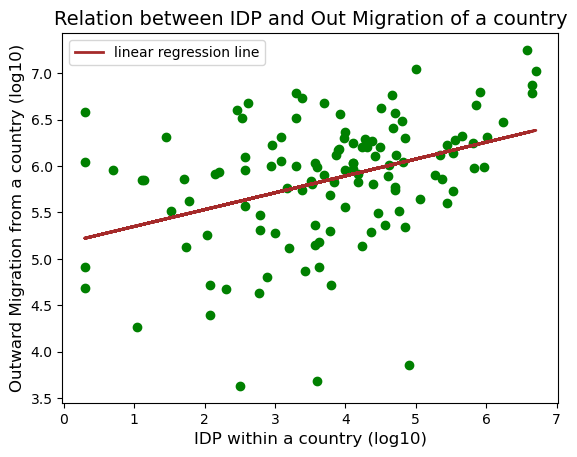

In [12]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
import matplotlib.pyplot as plt
import numpy as np
data1_raw = pd.to_numeric(combined_df["Disaster Internal Displacements"])
data1 = np.log10(data1_raw) #log10 values of data1_raw
data2_raw = pd.to_numeric(combined_df["OutMigration"])
data2 = np.log10(data2_raw) #log10 values of data2_raw
print(str(mean(data1))+","+str(std(data1)))
print(str(mean(data2))+","+str(std(data2)))
# plot
#use green as color for individual points
plt.plot(data1, data2, 'o', color='green')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(data1, data2, 1)
print("slope and intercept: "+str(m)+", "+str(b))
#use red as color for regression line
plt.plot(data1, m*data1+b, color='brown', label = 'linear regression line', linewidth = 2)
plt.xlabel('IDP within a country (log10)', fontsize = 12)
plt.ylabel('Outward Migration from a country (log10)', fontsize = 12)
plt.title('Relation between IDP and Out Migration of a country', fontsize = 14)
plt.legend()
plt.savefig('idpvsoutM.png', dpi=600)

Find the correlation score and the p-value for the two quantities using pearsonr package

In [13]:
from scipy.stats import pearsonr
corr, pval = pearsonr(data1, data2)
print(corr, pval)

0.38667961790061506 1.2860788498843191e-05
